In [2]:
################################## import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
################################## data in np array
X = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]).reshape(-1, 1)
y = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

<Figure size 800x500 with 0 Axes>

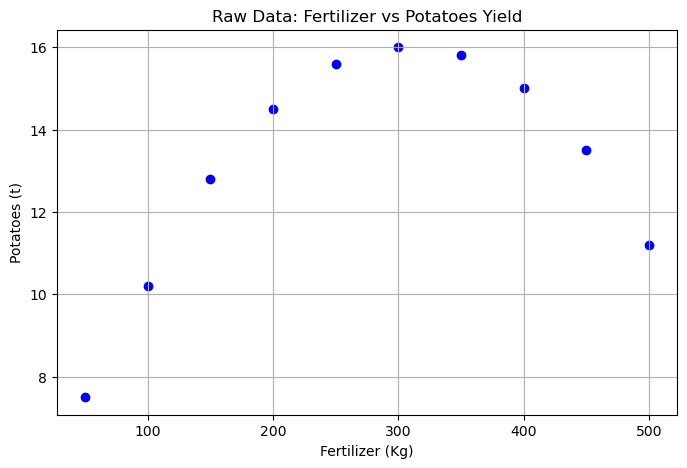

In [4]:
################################## scatter plot
plt.figure(figsize=(8, 5))
# create scatter plot of the points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Actual data', color='blue')
plt.xlabel("Fertilizer (Kg)")
plt.ylabel("Potatoes (t)")
plt.title("Raw Data: Fertilizer vs Potatoes Yield")
plt.grid(True)

optimal is 308.5438596491436 , [16.02763832]


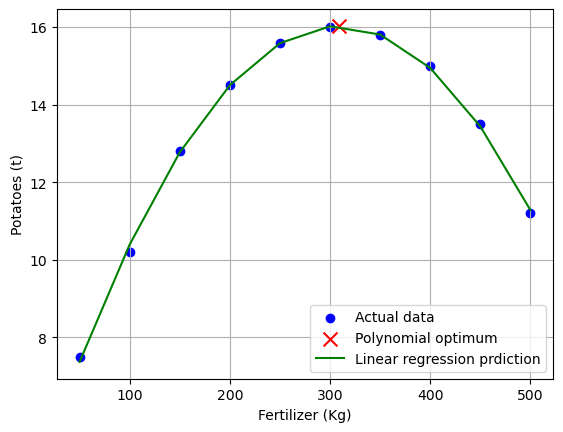

In [33]:
## no train-test
# linear
################################## create the model - linear regression + fit + predict

## poly 2nd level
## bonus -- 2nd 3rd 4th level -- check evaluation

# features generator
# pipeline
# 1 x x^2
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
polynomial_model.fit(X, y)
y_pred_linear = polynomial_model.predict(X)

# poly -- find optimal
# -b / 2a
coefs = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_
#                b2     b1   i 
c = intercept  # Ax^2 + Bx + C
b = coefs[1]
a = coefs[2]
x_opt = -b / (2 * a)
y_opt =  polynomial_model.predict([[x_opt]])

print(f"optimal is {x_opt} , {y_opt}")

plt.scatter(X, y, label='Actual data', color='blue')
plt.scatter([x_opt], [y_opt], marker='x', s=100, color='red', label='Polynomial optimum')
plt.plot(X, y_pred_linear, label="Linear regression prdiction", color="green")
plt.xlabel("Fertilizer (Kg)")
plt.ylabel("Potatoes (t)")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
### evaluation
# MAE
# MSE
# RMSE
# R^2
# ADJ R
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)
    
mse_linear = mean_squared_error(y, y_pred_linear)
mae_linear = mean_absolute_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y, y_pred_linear)

adj_r2 = adjusted_r2(r2_linear, n=len(y), p=X.shape[1])
print(f"MSE       : {mse_linear:.6f}")
print(f"MAE       : {mae_linear:.6f}")
print(f"RMSE      : {rmse_linear:.6f}")
print(f"R^2       : {r2_linear:.6f}")
print(f"ADJ R^2   : {adj_r2:.6f}")


MSE       : 0.006986
MAE       : 0.059455
RMSE      : 0.083584
R^2       : 0.999016
ADJ R^2   : 0.998893


optimal is 308.54385964912314 , 16.02763831738437


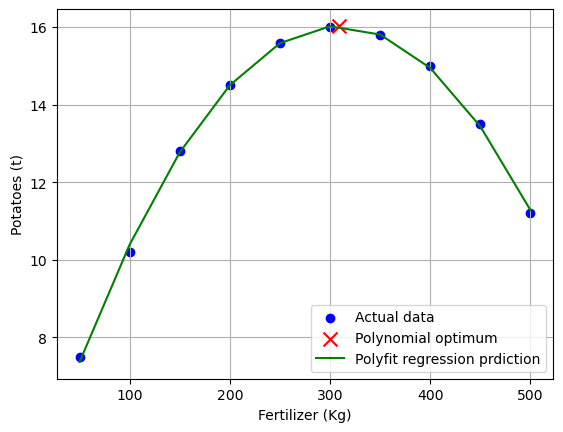

In [27]:
# polyfit

X = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
y = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

coeffs_np = np.polyfit(X, y, deg=2)
poly_function = np.poly1d(coeffs_np)  # generate math function

y_pred = poly_function(X)

#                   b2     b1   i 
c = coeffs_np[2]  # Ax^2 + Bx + C
b = coeffs_np[1]
a = coeffs_np[0]
x_opt = -b / (2 * a)
y_opt =  poly_function(x_opt)

print(f"optimal is {x_opt} , {y_opt}")

plt.scatter(X, y, label='Actual data', color='blue')
plt.scatter([x_opt], [y_opt], marker='x', s=100, color='red', label='Polynomial optimum')
plt.plot(X, y_pred, label="Polyfit regression prdiction", color="green")
plt.xlabel("Fertilizer (Kg)")
plt.ylabel("Potatoes (t)")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)
    
mse_linear = mean_squared_error(y, y_pred)
mae_linear = mean_absolute_error(y, y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y, y_pred)

adj_r2 = adjusted_r2(r2_linear, n=len(y), p=1)
print(f"MSE       : {mse_linear:.6f}")
print(f"MAE       : {mae_linear:.6f}")
print(f"RMSE      : {rmse_linear:.6f}")
print(f"R^2       : {r2_linear:.6f}")
print(f"ADJ R^2   : {adj_r2:.6f}")

MSE       : 0.006986
MAE       : 0.059455
RMSE      : 0.083584
R^2       : 0.999016
ADJ R^2   : 0.998893
